## Introduction

Connor Gramling, John Hohman, Lynn Slutsky

Our goal is to find the best place to live for a new upcoming super hero named THE STEEL VENGEANCE. He just moved to Pittsburgh so he needs somewhere near a lot crime because he likes working close to home. Since he is just starting his crime fighting career he is also a little short on cash. Considering everything, he is looking for somewhere cheap with a high crime rate.

## The Metric
By taking property data, the number of crime incdents, and arrests per neighborhood we are looking for the cheapest place to live whith a lot of crime. We are going to base our final decision on dollars per criminal.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas
import scipy.stats as stats
%matplotlib inline

## Property Data
This analysis is to find the best place to live in Pittsburgh. This metric is therefore the cheapest neighborhood. I analyzed property data, specifically sale price of residential property to find the best neighborhood for this submetric.

Link to dataset: https://data.wprdc.org/dataset/property-data-with-geographic-identifiers/resource/8eff881d-4d28-4064-83f1-30cc991cfec7

In [44]:
#load data
#only includining id, classdesc, saleprice, saledesc, and neighborhood
property_data = pd.read_csv("property_data_pittsburgh_wprdc.csv", usecols=[24,34,36,87], low_memory=False) # use the column named _id as the row index

In [45]:
#to give an idea of what my data looks like:
property_data.head(10) #first 10 rows

,CLASSDESC,SALEPRICE,SALEDESC,NEIGHBORHOOD
0,RESIDENTIAL,699000.0,QUIT CLAIM / SPEC WARRNTY,Central Business District
1,RESIDENTIAL,350000.0,SALE NOT ANALYZ,Central Business District
2,RESIDENTIAL,265000.0,OTHER VALID,Central Business District
3,RESIDENTIAL,25550.0,OTHER,Bluff
4,RESIDENTIAL,45550.0,OTHER,Bluff
5,COMMERCIAL,85000.0,OTHER INVALID,Bluff
6,COMMERCIAL,250000.0,MULTI-PARCEL SA,Bluff
7,COMMERCIAL,113000.0,VALID SALE,Bluff
8,COMMERCIAL,250000.0,MULTI-PARCEL SA,Bluff
9,COMMERCIAL,35000.0,VALID SALE,Bluff


Cheapest 10 Residential neighborhoods:


NEIGHBORHOOD
Bedford Dwellings    14462.571429
Homewood West        15148.539095
Beltzhoover          15228.766716
Larimer              20049.363636
Esplen               23882.435115
Homewood North       25559.764208
Fairywood            25707.715789
East Hills           25765.192982
Knoxville            26936.936667
Hays                 27090.121495
Name: SALEPRICE, dtype: float64

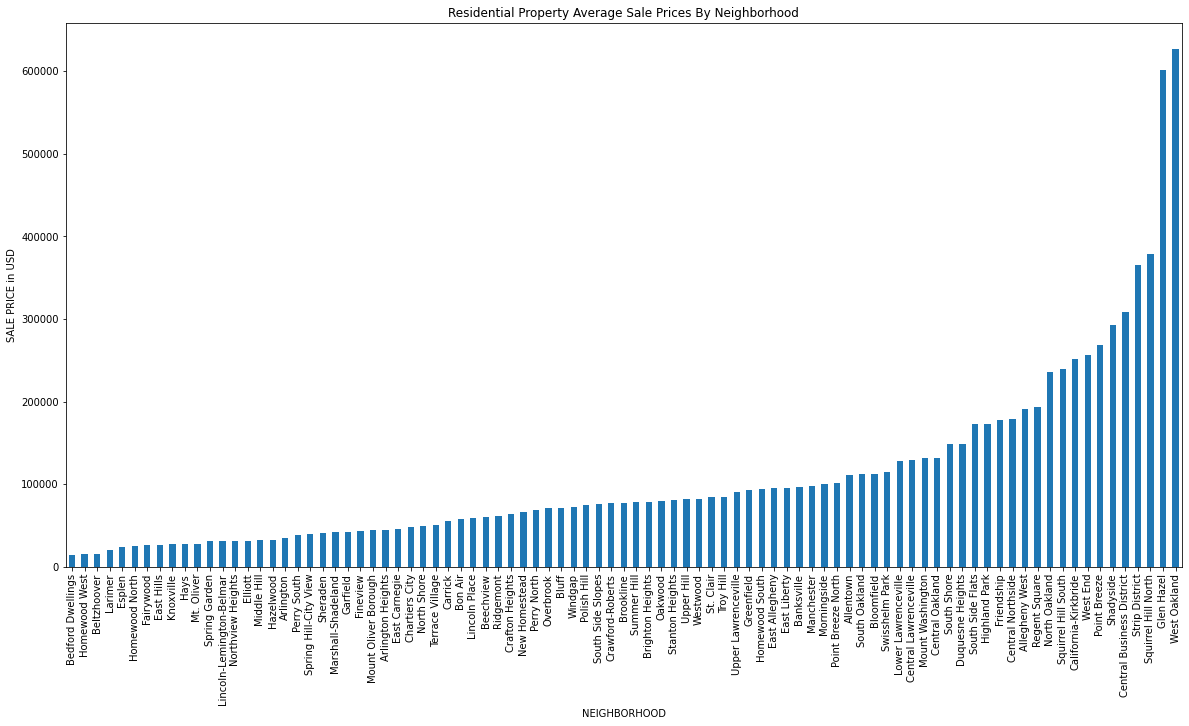

In [46]:
#get rid of love&affection sales (transferring property to family/ friends for a much lower price)
love_mask = property_data['SALEDESC']=='LOVE&AFFECTION'
edited_property_data = property_data.mask(love_mask)

#get rid of sale prices <=10000 dollars, to get rid of government sales, other outliers
price_mask = edited_property_data['SALEPRICE'] <= 1500 #these are the values we are removing
edited_property_data = edited_property_data.mask(price_mask)

#remove NaN neighborhoods
edited_property_data = edited_property_data[edited_property_data['NEIGHBORHOOD'].notnull()]

#isolate the two property types we are focusing
type_residential_mask = edited_property_data['CLASSDESC']=='RESIDENTIAL'
residential_data = edited_property_data[type_residential_mask]

#residential sorting and graph
#group by neighborhood
residential_data = residential_data.groupby('NEIGHBORHOOD').mean()

#sort ascending
residential_data_sorted = residential_data['SALEPRICE'].sort_values(ascending=True)
#bar graph
plt.title("Residential Property Average Sale Prices By Neighborhood")
plt.ylabel("SALE PRICE in USD")
residential_data_sorted.plot.bar(figsize = (20,10))

#We are looking for the cheapest housing, so:
#bottom ten:
print("Cheapest 10 Residential neighborhoods:")
#print(residential_data_sorted)
residential_data_sorted.head(10)

Text(0.5, 1.0, 'Residential Property Average Sale Prices Geo Map')

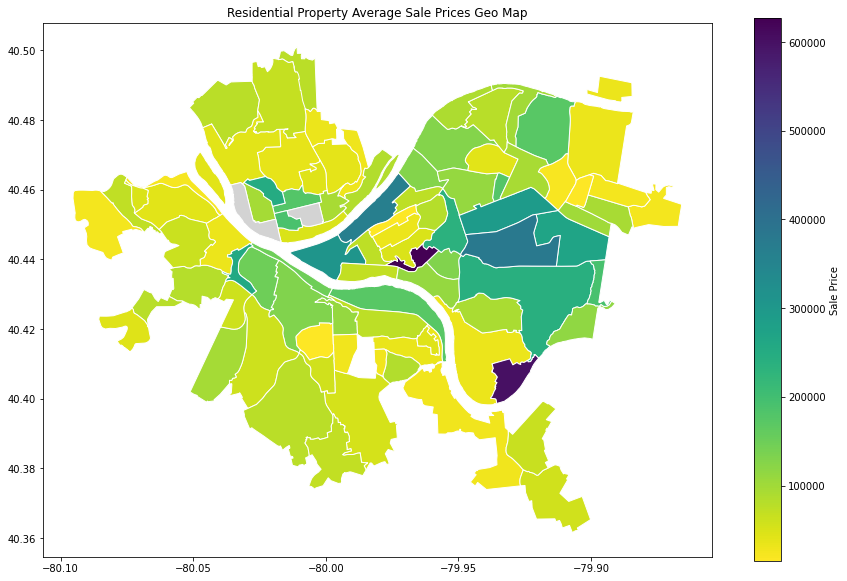

In [47]:
#Geopandas:
neighborhoods_geo = geopandas.read_file("Pitt/Neighborhoods_.shp")

residential_map = neighborhoods_geo.merge(residential_data["SALEPRICE"], how='left', left_on='hood', right_on='NEIGHBORHOOD')
residential_map[['hood',"SALEPRICE",'geometry']]
residential_map.plot(column='SALEPRICE', 
                     cmap=plt.cm.get_cmap('viridis').reversed(), 
                     edgecolor="white", 
                     legend=True, 
                     legend_kwds={'label': "Sale Price"}, 
                     figsize=(15, 10), 
                     missing_kwds={"color": "lightgrey"}) 
plt.title("Residential Property Average Sale Prices Geo Map")

## Property Data Conclusion:
The three cheapest residential neighborhoods are as follows:

Neighborhod	Price
Bedford Dwellings	14462.571429
Homewood West	15148.539095
Beltzhoover	15228.766716
. Therefore, our superhero should settle down in Bedford Dwellings, as it is the best neighborhood because it is the cheapest to live there.

## Arrest Data
The data I am sorting through is the arrest data from August 24, 2016, to March 31, 2022. This set is important to figure out which neighborhoods have more serious crimes that resulted in arrests. STEEL VENGEANCE wants to make a difference in the city by not only stopping petty crime but also hitting more serious crimes. The metric I am searching for is the most dangerous neighborhood with the most arrests.

In [48]:
pd.set_option('display.max_rows', None)
arrests = pd.read_csv("Pittsburgh Police Arrest Data.csv", usecols=['INCIDENTNEIGHBORHOOD', 'OFFENSES'])

hoods = arrests.groupby('INCIDENTNEIGHBORHOOD').count()
hoods_ordered = hoods['OFFENSES'].sort_values(ascending=True)
hoods_ordered

INCIDENTNEIGHBORHOOD
Mt. Oliver Neighborhood           2
Troy Hill-Herrs Island            6
Mt. Oliver Boro                  18
Central Northside                23
Regent Square                    28
Ridgemont                        29
Swisshelm Park                   33
New Homestead                    35
Chartiers City                   35
St. Clair                        42
East Carnegie                    44
Outside County                   46
Outside State                    52
Summer Hill                      60
Oakwood                          69
Golden Triangle/Civic Arena      83
Hays                             94
Windgap                          94
Fairywood                       100
Mount Oliver                    108
Allegheny West                  109
Arlington Heights               122
Glen Hazel                      136
Polish Hill                     137
Friendship                      143
Upper Lawrenceville             161
Morningside                     167
Duquesn

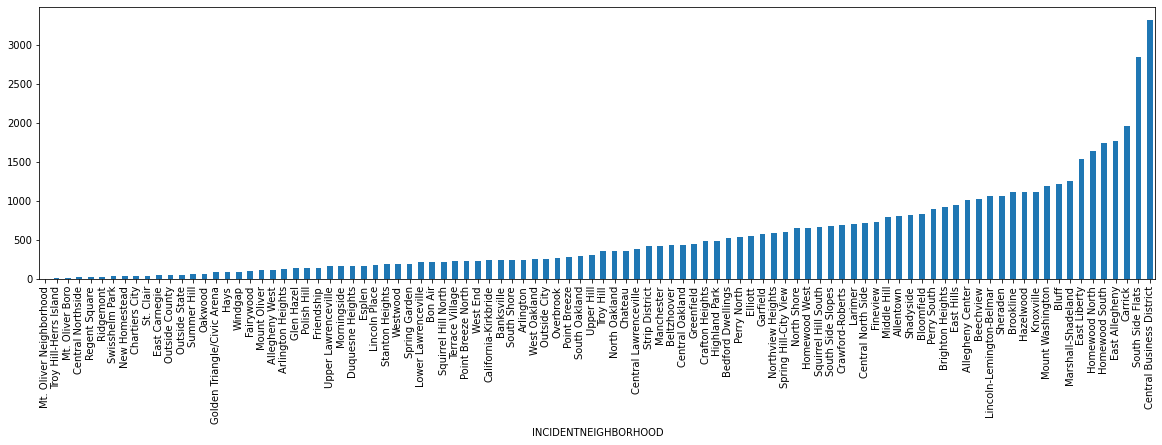

In [49]:
hoods_ordered.plot.bar(figsize = (20,5))

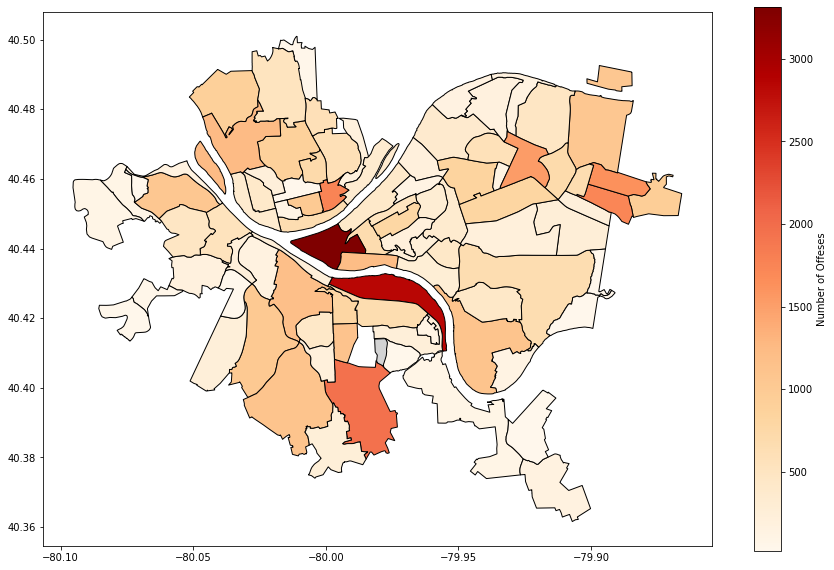

In [50]:
neighborhoods = geopandas.read_file("Pitt/Neighborhoods_.shp")
reports_map = neighborhoods.merge(hoods, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')
reports_map[['hood','OFFENSES','geometry']]
reports_map.plot( column = 'OFFENSES',
                cmap='OrRd',
                edgecolor="black",
                legend=True,
                legend_kwds={'label': "Number of Offeses"},
                figsize=(15, 10),
                missing_kwds={"color": "lightgrey"}
                )

## Arrests Conlusion
The data shows the neighborhoods number of arrests since 2016 in descending order. According to the data set the Central Business District has the highest amount of arrests throughout the Pittsburgh neighborhoods with 3313 arrests since 2016. South Side Flats isn't too far behind that with 2840 arrests.

## Incidents Data
This data is crucial to review in order to determine the best neighborhood in Pittsburgh due to the data allowing historical analysis that would be otherwise unavailable to a newcomer to the city.

This data will be later used in conjunction with more modern data to help "Steel Vegenence" to see the change in crime overtime.

The Metric: The metric of this section is the total number of police incident reports per neighborhood in Pittsburgh from 2005 to 2015.

This section also look into the normal distribution of the probability that a neighborhood will have a certain amount of incident reports.

In [51]:
reports = pd.read_csv("police.csv", low_memory=False)



num_reports = reports.groupby("INCIDENTNEIGHBORHOOD").nunique()



num_reports = num_reports.sort_values('PK', ascending=True)
std = num_reports["PK"].std()
mean = num_reports["PK"].mean()
print("std: ", std)
print("mean: ", mean)
print("mean: ", num_reports.shape)

std:  1269.4567703080754
mean:  977.1190476190476
mean:  (84, 12)


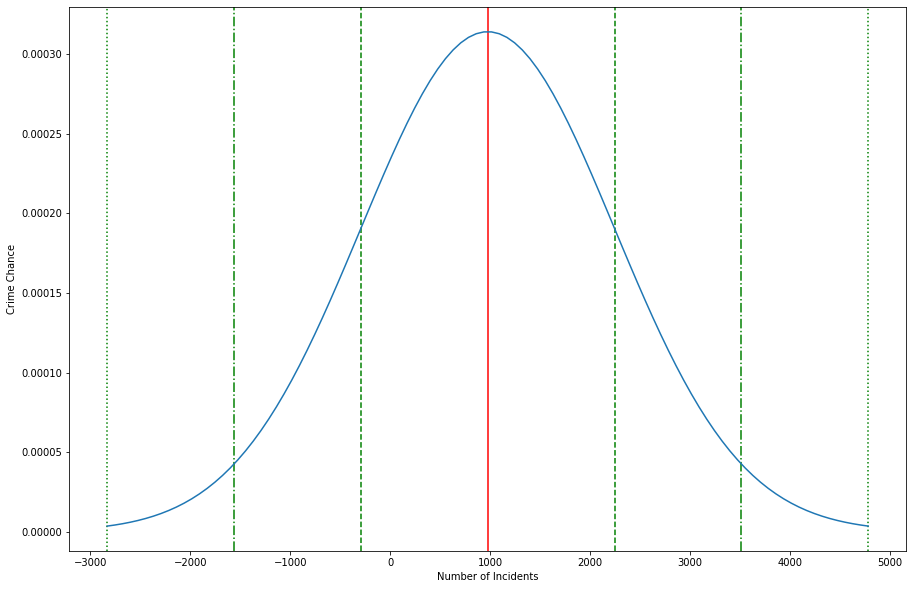

In [52]:
x = np.linspace(mean - 3*std, mean + 3*std, 100)
plt.figure(figsize=(15,10))
plt.ylabel('Crime Chance')
plt.xlabel('Number of Incidents')
plt.axvline(mean, color='r', linestyle='solid')
plt.axvline((mean + std), color='g', linestyle='--')
plt.axvline((mean - std), color='g', linestyle='--')
plt.axvline((mean + 2*std), color='g', linestyle='-.')
plt.axvline((mean - 2*std), color='g', linestyle='-.')
plt.axvline((mean + 3*std), color='g', linestyle=':')
plt.axvline((mean - 3*std), color='g', linestyle=':')
plt.plot(x, stats.norm.pdf(x, mean, std))
plt.show()

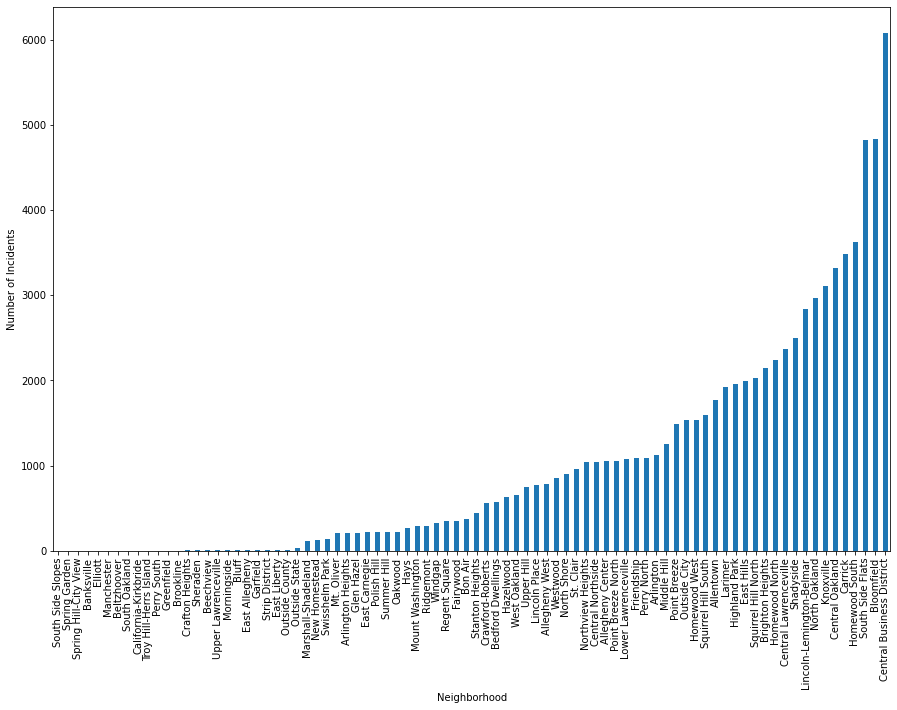

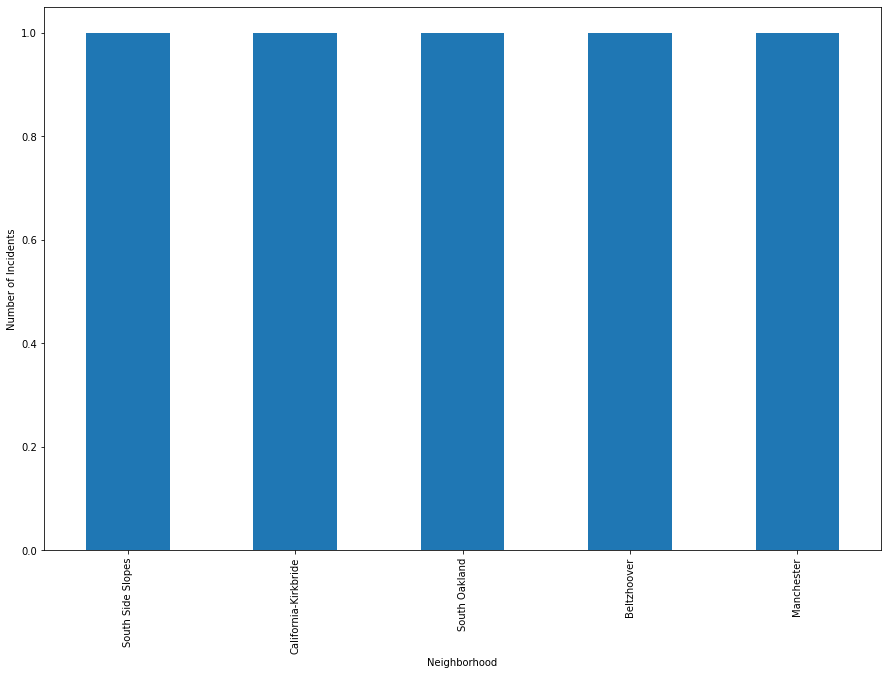

In [53]:
num_reports["PK"].plot.bar(figsize=(15,10))
plt.xlabel('Neighborhood')
plt.ylabel('Number of Incidents')
plt.show()

nim_reports = num_reports.sort_values('PK', ascending=True).head()

nim_reports["PK"].head().plot.bar(figsize=(15,10))
plt.xlabel('Neighborhood')
plt.ylabel('Number of Incidents')
plt.show()

The Best Neighborhood:
Downtown Pittsburgh is the best neighboorhood for "Steel Vengence" to look for a home accoring to only historical data.

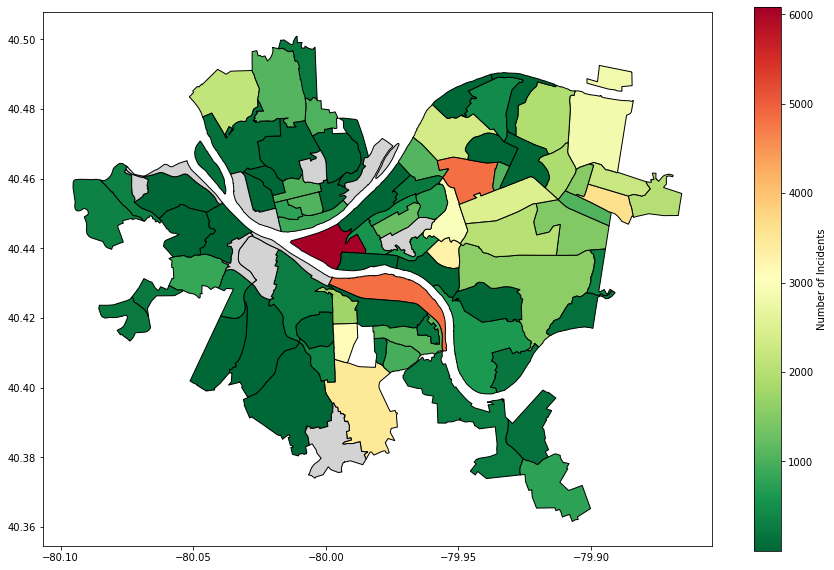

In [54]:
neighborhoods = geopandas.read_file("Pitt/Neighborhoods_.shp")


reports_map = neighborhoods.merge(num_reports["PK"], how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')

reports_map[['hood','PK','geometry']]

reports_map.plot(column='PK', cmap=plt.cm.get_cmap('RdYlGn').reversed(), edgecolor="Black", legend=True, legend_kwds={'label': "Number of Incidents"}, figsize=(15, 10), missing_kwds={"color": "lightgrey"})

## Incidents Conculsion
"Steel Vengeance" having gone through my data, now understands that getting a home in Downtown Pittsburgh is his best course of action.

If he was only looking through historical data as the central part of the city has had over 6000 incident reports written over 10 years.

## Conmbined Data


                           $ per Criminal
Neighborhood                             
Knoxville                        6.378626
Homewood North                   6.589266
Homewood West                    6.895102
Larimer                          7.620435
Lincoln-Lemington-Belmar         8.026861
East Hills                       8.736925
Carrick                         10.116956
Bedford Dwellings               13.135851
Middle Hill                     15.617861
Homewood South                  17.518685
Hazelwood                       18.472467
Northview Heights               19.209787
Bloomfield                      19.781197
South Side Flats                22.512124
Arlington                       25.128865
Brighton Heights                25.693913
Marshall-Shadeland              30.464876
North Shore                     31.748713
Central Business District       32.786998
Beltzhoover                     34.928364
Central Oakland                 35.032064
Sheraden                        38

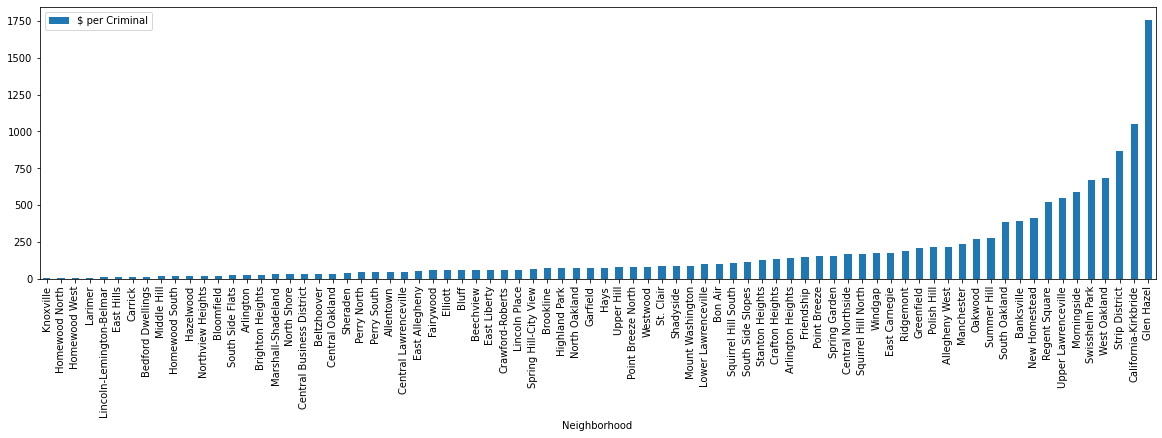

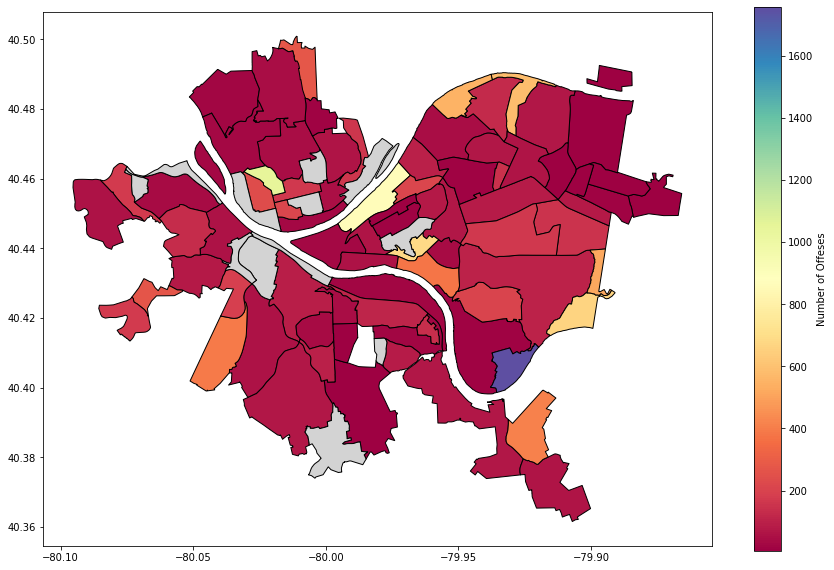

In [55]:
crimes = num_reports['PK'] + hoods_ordered
dol_per_crim = residential_data_sorted / crimes
remove_nan = dol_per_crim.dropna()
metric_ordered = remove_nan.sort_values(ascending=True)

dol_per_crim_df = pd.DataFrame(metric_ordered).reset_index()
dol_per_crim_df.columns = ['Neighborhood', '$ per Criminal']
dollars_per_crim = dol_per_crim_df.set_index('Neighborhood')
print(dollars_per_crim)

dollars_per_crim.plot.bar(figsize = (20,5))

reports_map = neighborhoods.merge(dollars_per_crim, how='left', left_on='hood', right_on='Neighborhood')
reports_map[['hood','$ per Criminal','geometry']]
reports_map.plot( column = '$ per Criminal',
                cmap='Spectral',
                edgecolor="black",
                legend=True,
                legend_kwds={'label': "Number of Offeses"},
                figsize=(15, 10),
                missing_kwds={"color": "lightgrey"}
                )

## Conclusion

Our superhero, STEEL VENGANCE, is just starting out his hero career. He is looking to find the most efficient spot for him to live and be near the most crime for his buck. The cheapest neighborhood individually is Bedford Dwellings. The two most crime ridden neighborhoods, according to Arrect Data and Incident reports respectively are Central Business District and Downtown. These submetrics provide our superhero with three quality options, but not the full report on where he would like to live. STEEL VENGANCE doesn't just want a high crime rate or a cheap property, he wants the best of both! In that regard, we found that Knoxville is the best neighborhood. Knoxville in terms of dollars per criminal sits at 6.38. This is only 0.21 higher than our runner up, Homewood North, which sits at 6.58 dollars per criminal. This metric means that for every 3.85 dollars spent on buying his property in Knoxville, STEEL VENGANCE can aprehend one criminal. Thats a great value!